# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include=np.number).head(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare


In [5]:
#your code here- categorical variable
def conv(df,col_name):  
    df[col_name] = df[col_name].astype("category")
    return df[col_name]

conv(titanic,"Gender")
conv(titanic,"Pclass")
conv(titanic,"Survived")

titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Gender         category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0.5, 1.0, 'Age Histo')

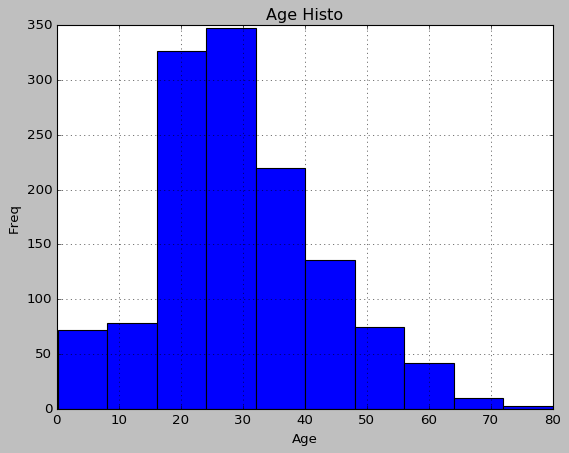

In [9]:
# your code here
titanic["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title('Age Histo')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

Text(0.5, 0, 'Age')

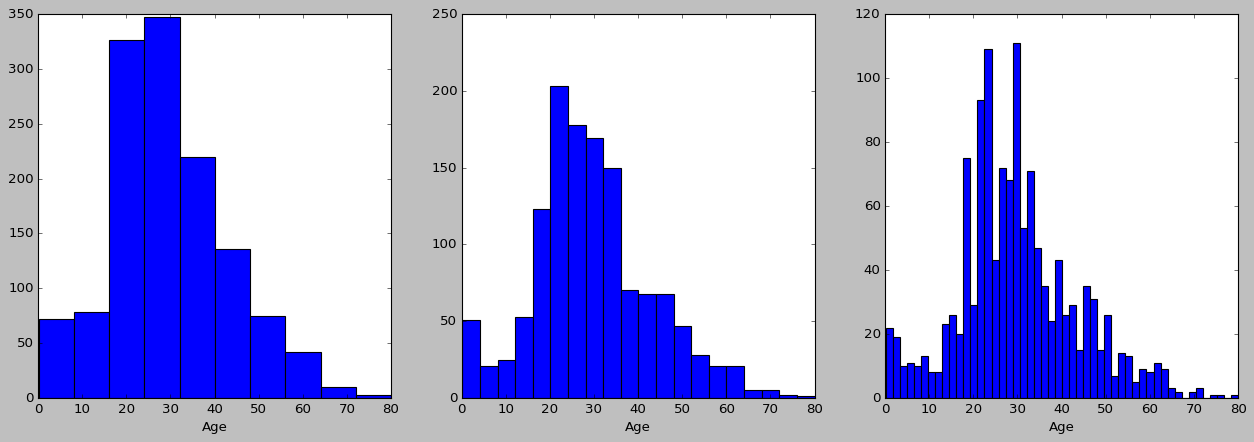

In [10]:
# your code here
x = titanic["Age"]
fig,ax = plt.subplots(1,3)
ax[0].hist(x,bins=10)
ax[1].hist(x,bins=20)
ax[2].hist(x,bins=50)
plt.subplots_adjust(right=2)
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[2].set_xlabel("Age")

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
'''
Mientras menos bins mayor rango de edades es la agrupación

'''

#### Use seaborn to show the distribution of the column `Age`

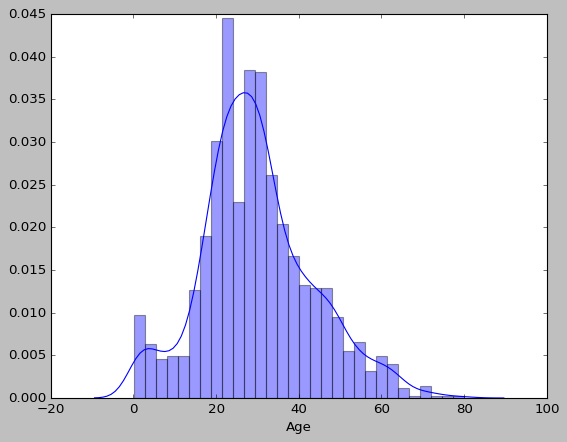

In [11]:
# your code here
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0.5, 1.0, 'Gender of people in the Titanic')

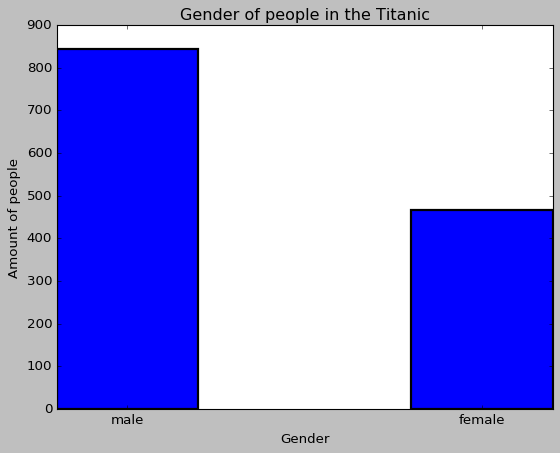

In [12]:
# your code here- 1st way
x = titanic.Gender.unique()
y = titanic.Gender.value_counts()
plt.bar(x,y,width=0.4,linewidth=2)
plt.xlabel("Gender")
plt.ylabel("Amount of people")
plt.title("Gender of people in the Titanic")

Text(0.5, 1.0, 'Gender of people in the Titanic')

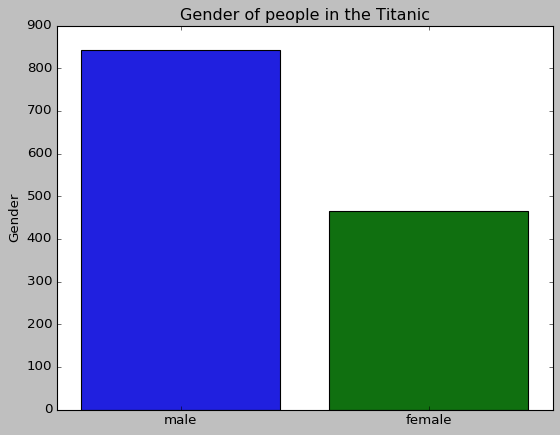

In [13]:
# your code here- 2nd way
x = titanic.Gender.unique()
y = titanic.Gender.value_counts()
sns.barplot(x,y).set_title("Gender of people in the Titanic")

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0.5, 1.0, 'Pclass in the Titanic')

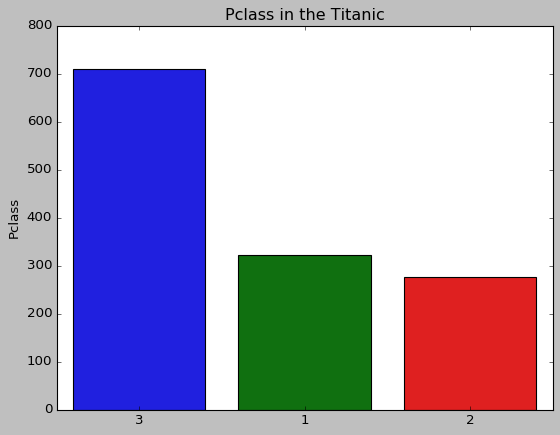

In [14]:
# your code here

x = titanic.Pclass.unique()
y = titanic.Pclass.value_counts()

sns.barplot(x,y).set_title("Pclass in the Titanic")

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

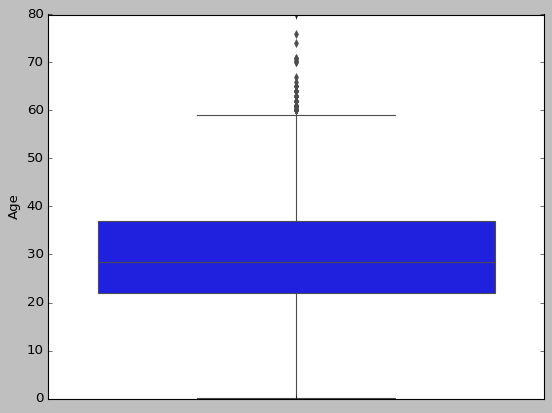

In [15]:
# your code here
sns.boxplot(titanic.Age,orient="v")

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
'''
la media es de 28
50% de las personas se encuentra entre las edades de 22 a 37 años.
'''

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

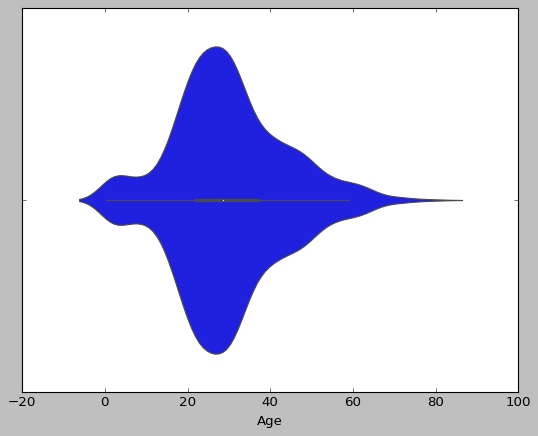

In [16]:
#your code here
sns.violinplot(titanic.Age,orient="h")


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

Text(0.5, 1.0, 'Titanic: Fare vs Age')

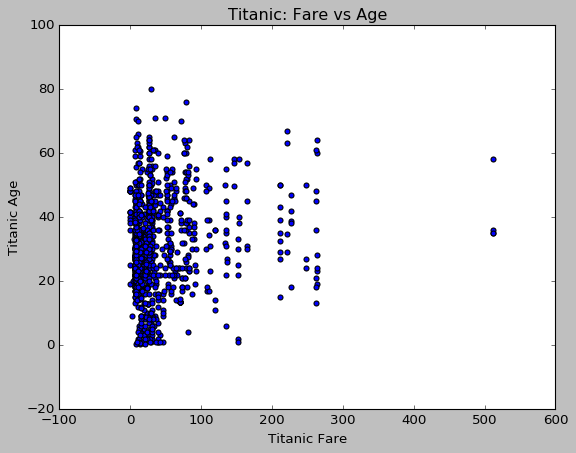

In [20]:
#your code-1st way
fare = titanic.Fare
age = titanic.Age
plt.scatter(f,a)
plt.xlabel("Titanic Fare")
plt.ylabel("Titanic Age")
plt.title("Titanic: Fare vs Age")

Text(0.5, 1.0, 'Titanic: Fare vs Age')

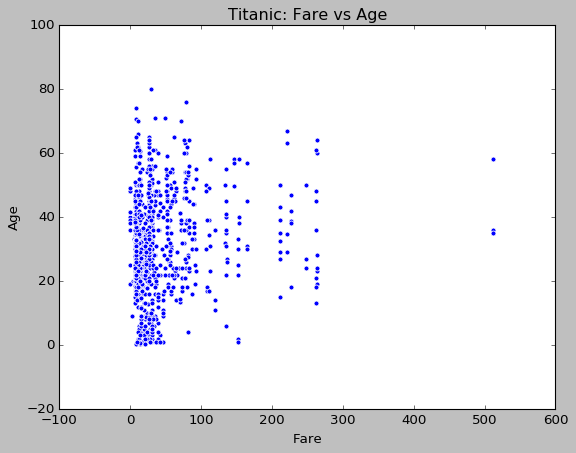

In [19]:
# your code-2nd way
fare = titanic.Fare
age = titanic.Age
sns.scatterplot("Fare","Age",data=titanic).set_title("Titanic: Fare vs Age")

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

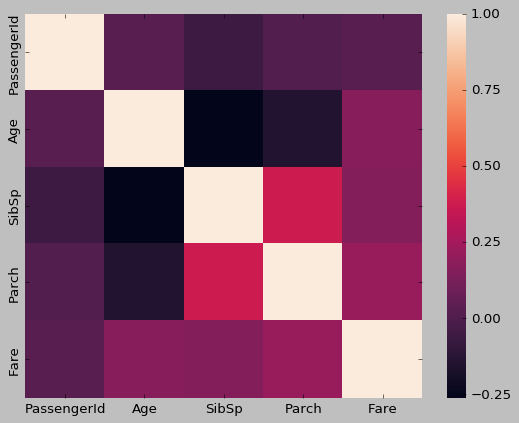

In [21]:
#your code here
correla = titanic.corr()
sns.heatmap(correla)

#### According to the previous plot, what are the most correlated feature? Comment.

In [24]:
#your comment here
'''
Las correlaciones mas altas son "Parch" y "SibSp".
'''

'\nLas correlaciones mas altas son "Parch" y "SibSp".\n'

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

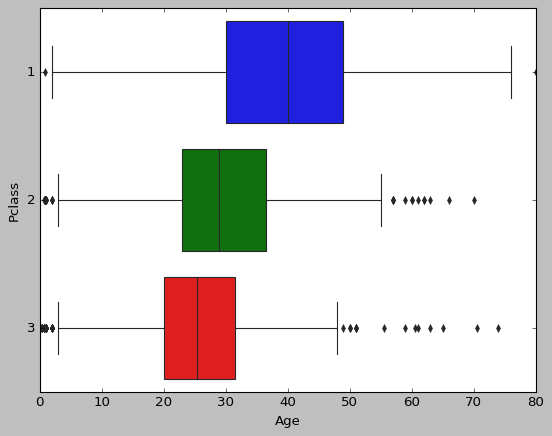

In [23]:
#your code here
sns.boxplot(x="Age",y="Pclass",data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

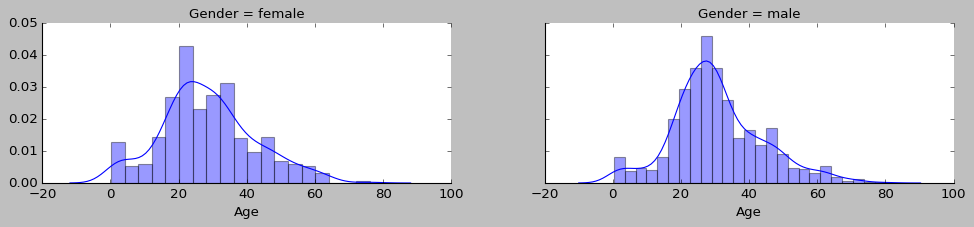

In [22]:
#your code here
g = sns.FacetGrid(titanic,col="Gender")
g.map(sns.distplot,"Age")
plt.subplots_adjust(right=2)